In [11]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

import gmaps
import gmaps.datasets
from datetime import date
import seaborn as sns

from matplotlib.pyplot import figure

sns.set(color_codes=True)

In [3]:
#import csv file
df1 = pd.read_csv("Desktop/LA Citations 2018/LA-Crime-Project-2018/out2.csv")

#preview file
df1.head()

/Users/Andres/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
0,0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
1,1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018
2,2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
3,3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
4,4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018


In [4]:
#covert issue time to date time format

df1['Issued Date'] = df1['Issue Date'].map(lambda x: str(x)[:-9])
df1["Issued Date"] = pd.to_datetime(df1['Issued Date'])

#verify data type changed

df1.dtypes

Unnamed: 0                        int64
Ticket number                    object
Issue Date                       object
Issue time                      float64
RP State Plate                   object
Plate Expiry Date               float64
Make                             object
Body Style                       object
Color                            object
Location                         object
Route                            object
Agency                          float64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
year                              int64
Issued Date              datetime64[ns]
dtype: object

In [6]:
#get day of week from date

df1['Day'] = df1['Issued Date'].dt.dayofweek

#verify change

df1.sample(10)

,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Issued Date,Day
93004,93004,4324208000,2018-01-10T00:00:00,1240.0,CA,1.0,CHEV,PA,WT,300 WALL ST S,00661,56.0,80.56E4+,RED ZONE,93.0,6.487816e+06,1.839925e+06,2018,2018-01-10,2
530301,530301,4329308900,2018-03-31T00:00:00,845.0,CA,201901.0,NISS,PA,MR,502 78TH ST W,00544,55.0,80.69B,NO PARKING,73.0,6.475943e+06,1.811157e+06,2018,2018-03-31,5
1685885,1685885,4341165835,2018-10-29T00:00:00,1156.0,CA,201810.0,MASE,PA,WT,5631 HOLLYWOOD BLVD,00448,54.0,80.71.4,PRIVATE PROPERTY,68.0,9.999900e+04,9.999900e+04,2018,2018-10-29,0
84796,84796,4324095510,2018-01-22T00:00:00,811.0,CT,201611.0,HOND,PA,GY,660 SOUTH CLOVERDALE AVENUE,00476,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.456825e+06,1.845570e+06,2018,2018-01-22,0
1487642,1487642,4340006020,2018-09-20T00:00:00,1233.0,CA,201806.0,BMW,PA,SL,2000 PONTIUS AVE,161R,51.0,5204A-,DISPLAY OF TABS,25.0,6.428108e+06,1.838203e+06,2018,2018-09-20,3
1861717,1861717,4343788610,2018-12-04T00:00:00,858.0,CA,201903.0,HOND,PA,WT,300 SWALL DR S,00474,54.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.444830e+06,1.849387e+06,2018,2018-12-04,1
1744418,1744418,1126569393,2018-11-06T00:00:00,531.0,CA,201907.0,HOND,PA,GY,7129 S 10TH AVE,00500,55.0,8056E4,RED ZONE,93.0,6.462233e+06,1.813577e+06,2018,2018-11-06,1
939740,939740,4334156621,2018-06-05T00:00:00,1413.0,CA,201902.0,MITS,PA,RD,410 NEW HAMPSHIRE AVE N,00456,54.0,80.69C,PARKED OVER TIME LIMIT,58.0,6.472870e+06,1.850833e+06,2018,2018-06-05,1
1642138,1642138,4341888655,2018-10-19T00:00:00,1833.0,CA,201901.0,MERZ,PA,WT,1850 LA BREA AVE N,00402,54.0,22502A,18 IN. CURB/2 WAY,63.0,6.456926e+06,1.860468e+06,2018,2018-10-19,4
167040,167040,4325224606,2018-01-25T00:00:00,943.0,GA,201812.0,KIA,PA,WT,3756 BAGLEY AVE,00141,51.0,80.69BS,NO PARK/STREET CLEAN,73.0,6.441668e+06,1.832341e+06,2018,2018-01-25,3


In [8]:
#groupby to get citation counts by day

out = df1.groupby("Day").count()
out.head(10)

,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Issued Date
Day,,,,,,,,,,,,,,,,,,,
0,333201,333201,333201,333138,333201,299467,332966,332918,333074,333187,331619,333201,333201,333168,332995,333201,333201,333201,333201
1,397653,397653,397653,397580,397653,358384,397311,397310,397506,397637,395578,397653,397653,397605,397385,397653,397653,397653,397653
2,375300,375300,375300,375222,375300,339283,374969,374949,375176,375284,373432,375300,375300,375240,375020,375300,375300,375300,375300
3,378566,378566,378566,378493,378566,342636,378233,378201,378432,378556,376681,378566,378566,378525,378277,378566,378566,378566,378566
4,313611,313611,313611,313526,313611,283283,313331,313331,313485,313604,311611,313610,313611,313578,313372,313611,313611,313611,313611
5,98625,98625,98625,98548,98625,89148,98448,98312,98480,98610,95642,98623,98625,98597,98432,98623,98623,98625,98625
6,100982,100982,100982,100902,100982,91907,100841,100699,100870,100969,98127,100981,100982,100962,100808,100982,100982,100982,100982


In [10]:
#new df for graph data

out = out[["Ticket number"]]
final_chart=out.rename(index={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
final_chart

,Ticket number
Day,
Monday,333201
Tuesday,397653
Wednesday,375300
Thursday,378566
Friday,313611
Saturday,98625
Sunday,100982


In [46]:
# df1.groupby(df1["Issued Date"].dt.month).count().plot(kind="bar", legend=False, color="b")
# plt.show()

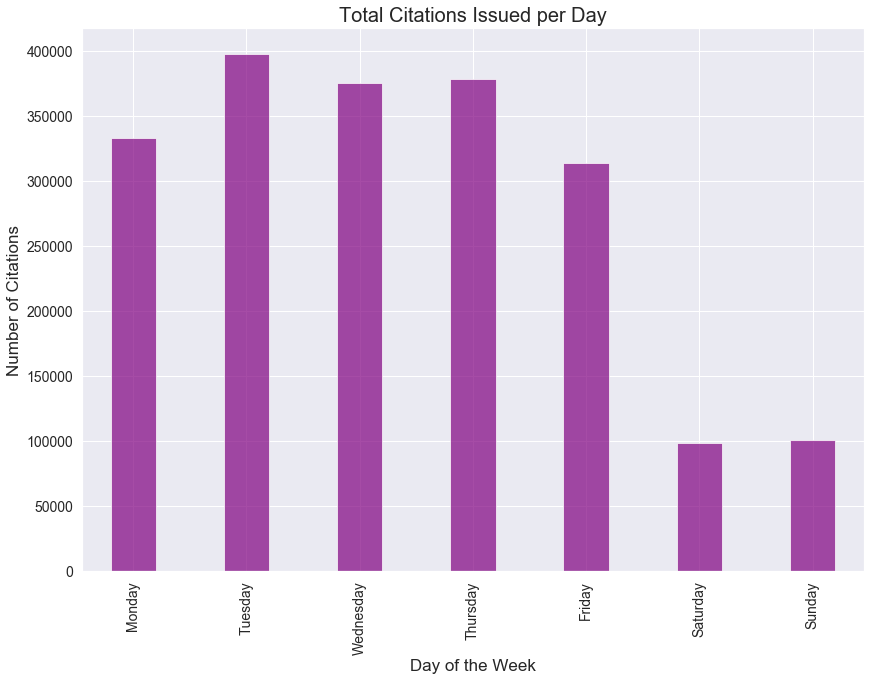

In [31]:
#build chart

final_chart.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.7, figsize=(14,10), fontsize=14)
plt.xlabel("Day of the Week",fontsize=17)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations Issued per Day",fontsize=20)

plt.savefig("daily_citations.png")
plt.show()

# Analysis
The graph shows a leveled number of ticket accross the workweek. Just about a 1/4 of the daily citations happened on Saturday and Sunday individually. Tuesday saw the most citations by about 25,000 more than Wednesday or Thursday.